In [26]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import weatherbench2 as wb
import sys, os
sys.path.append('/users/mfeldman/code/xarray_parcel/')
print(sys.path)
import modules.parcel_functions as parcel
print('modules loaded')

['/users/mfeldman/code/AI-storm/devel', '/users/mfeldman/.conda/envs/wb/lib/python310.zip', '/users/mfeldman/.conda/envs/wb/lib/python3.10', '/users/mfeldman/.conda/envs/wb/lib/python3.10/lib-dynload', '', '/users/mfeldman/.conda/envs/wb/lib/python3.10/site-packages', '$HOME/code/xarray_parcel/', '$HOME/code/xarray_parcel/', '$HOME/code/xarray_parcel/', '$HOME/code/xarray_parcel/', '/users/mfeldman/code/xarray_parcel/', '/users/mfeldman/code/xarray_parcel/', '/users/mfeldman/code/xarray_parcel/', '/users/mfeldman/code/xarray_parcel/']
modules loaded


In [48]:
## DATA PATHS ON GOOGLE CLOUD
#tigge_path='gs://weatherbench2/datasets/ens/2020-1440x721.zarr/' -> only 3 pressure levels
#era_5_fcst='gs://weatherbench2/datasets/era5-forecasts/2020-1440x721.zarr' -> only 3 pressure levels
hres='gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr'
era5='gs://weatherbench2/datasets/era5/1959-2022-6h-1440x721.zarr'
pangu='gs://weatherbench2/datasets/pangu/2018-2022_0012_0p25.zarr'

In [49]:
tigge=xr.open_zarr(pangu)

In [50]:
print(tigge)

<xarray.Dataset>
Dimensions:                  (time: 3652, prediction_timedelta: 40,
                              latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                 (latitude) float32 90.0 89.75 89.5 ... -89.75 -90.0
  * level                    (level) int64 1000 925 850 700 ... 200 150 100 50
  * longitude                (longitude) float32 0.0 0.25 0.5 ... 359.5 359.8
  * prediction_timedelta     (prediction_timedelta) timedelta64[ns] 06:00:00 ...
  * time                     (time) datetime64[ns] 2018-01-01 ... 2022-12-31T...
Data variables:
    10m_u_component_of_wind  (time, prediction_timedelta, latitude, longitude) float32 dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind  (time, prediction_timedelta, latitude, longitude) float32 dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_wind_speed           (time, prediction_timedelta, latitude, longitude) float32 dask.array<chunksize=(1, 1, 721, 1440)

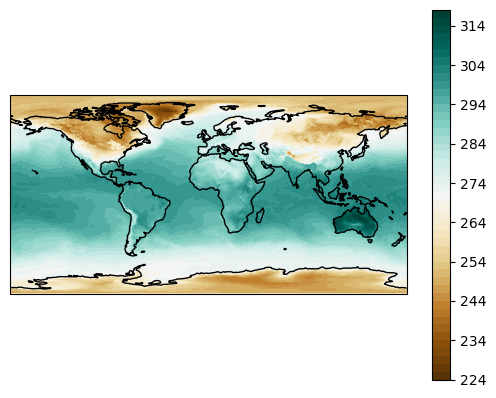

In [59]:
from cartopy import config
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
mslp=tigge['2m_temperature'][0,0,:,:]
p=plt.contourf(tigge.longitude, tigge.latitude, mslp, 60,
             transform=ccrs.PlateCarree(),cmap='BrBG')
plt.colorbar(p)
#plt.imshow(tigge.mean_sea_level_pressure[0,1,0,:,:])
ax.coastlines()

plt.show()

In [57]:
tigge.temperature

<xarray.DataArray 'temperature' (time: 3652, prediction_timedelta: 40,
                                 level: 13, latitude: 721, longitude: 1440)>
dask.array<open_dataset-temperature, shape=(3652, 40, 13, 721, 1440), dtype=float32, chunksize=(1, 1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float32 90.0 89.75 89.5 ... -89.75 -90.0
  * level                 (level) int64 1000 925 850 700 600 ... 200 150 100 50
  * longitude             (longitude) float32 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 0 days 06:00...
  * time                  (time) datetime64[ns] 2018-01-01 ... 2022-12-31T12:...

In [53]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)  
print(client)

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/users/mfeldman/.conda/envs/wb/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2821, in settrace
    _locked_settrace(
  File "/users/mfeldman/.conda/envs/wb/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2929, in _locked_settrace
    py_db.wait_for_ready_to_run()
  File "/users/mfeldman/.conda/envs/wb/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 838, in wait_for_ready_to_run
    self._py_db_command_thread_event.wait(0.1)
  File "/users/mfeldman/.conda/envs/wb/lib/python3.10/threading.py", line 607, in wait
    signaled = self._cond.wait(timeout)
  File "/users/mfeldman/.conda/envs/wb/lib/python3.10/threading.py", line 324, in wait
    gotit = waiter.acquire(True, timeout)
KeyboardInterrupt
2023-11-24 14:45:56,091 - distributed.nanny - WARNING - Restarting worker


KeyboardInterrupt: 

In [56]:
#parcel.moist_adiabat_tables(regenerate=True)

(<xarray.Dataset>
 Dimensions:      (pressure: 2196, temperature: 7150)
 Coordinates:
   * pressure     (pressure) float64 1.1e+03 1.1e+03 1.099e+03 ... 3.5 3.0 2.5
   * temperature  (temperature) float64 173.0 173.0 173.0 ... 315.9 316.0 316.0
 Data variables:
     adiabat      (pressure, temperature) float64 dask.array<chunksize=(2196, 7150), meta=np.ndarray>,
 <xarray.Dataset>
 Dimensions:      (adiabat: 14300, pressure: 2196)
 Coordinates:
   * pressure     (pressure) float64 1.1e+03 1.1e+03 1.099e+03 ... 3.5 3.0 2.5
   * adiabat      (adiabat) int64 1 2 3 4 5 6 ... 14296 14297 14298 14299 14300
 Data variables:
     temperature  (adiabat, pressure) float64 dask.array<chunksize=(14300, 2196), meta=np.ndarray>)